In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('HINDALCO_1D.csv')

In [59]:
df = df.reset_index()
df

,datetime,close,high,low,open,volume,instrument,EMA_20,EMA_50,signal,position
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO,114.000000,114.000000,0.0,NaN
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO,112.477500,112.521000,0.0,0.0
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO,112.963114,112.964498,0.0,0.0
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO,112.612907,112.642418,0.0,0.0
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO,111.521273,111.659832,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,2018-12-21,224.00,227.45,221.80,224.25,6933691,HINDALCO,223.824133,226.147020,0.0,0.0
1211,2018-12-24,217.85,224.00,216.95,224.00,4667022,HINDALCO,223.255168,225.821647,0.0,0.0
1212,2018-12-26,218.60,219.80,212.90,213.85,6554865,HINDALCO,222.811818,225.538445,0.0,0.0
1213,2018-12-27,220.60,223.90,219.60,221.40,7947144,HINDALCO,222.601169,225.344780,0.0,0.0


In [60]:
df.head()

,datetime,close,high,low,open,volume,instrument,EMA_20,EMA_50,signal,position
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO,114.000000,114.000000,0.0,NaN
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO,112.477500,112.521000,0.0,0.0
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO,112.963114,112.964498,0.0,0.0
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO,112.612907,112.642418,0.0,0.0
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO,111.521273,111.659832,0.0,0.0


## Adding Exponential Moving Average for 20 days(short term)  and 50 days ( long term )columns

In [61]:
df['EMA_20']=df['close'].ewm(span=20).mean()
df['EMA_50']=df['close'].ewm(span=50).mean()

In [62]:
df.head()

,datetime,close,high,low,open,volume,instrument,EMA_20,EMA_50,signal,position
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO,114.000000,114.000000,0.0,NaN
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO,112.477500,112.521000,0.0,0.0
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO,112.963114,112.964498,0.0,0.0
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO,112.612907,112.642418,0.0,0.0
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO,111.521273,111.659832,0.0,0.0


## Generating Signals

##### When the short term moving average crosses above the long term moving average, this indicates a **Buy** signal
##### Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to **sell** signal

In [63]:
df['signal']=0

In [64]:
df

,datetime,close,high,low,open,volume,instrument,EMA_20,EMA_50,signal,position
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO,114.000000,114.000000,0,NaN
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO,112.477500,112.521000,0,0.0
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO,112.963114,112.964498,0,0.0
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO,112.612907,112.642418,0,0.0
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO,111.521273,111.659832,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,2018-12-21,224.00,227.45,221.80,224.25,6933691,HINDALCO,223.824133,226.147020,0,0.0
1211,2018-12-24,217.85,224.00,216.95,224.00,4667022,HINDALCO,223.255168,225.821647,0,0.0
1212,2018-12-26,218.60,219.80,212.90,213.85,6554865,HINDALCO,222.811818,225.538445,0,0.0
1213,2018-12-27,220.60,223.90,219.60,221.40,7947144,HINDALCO,222.601169,225.344780,0,0.0


In [65]:
df['signal'] = np.where(df['EMA_20'] > df['EMA_50'], 1.0, 0.0)

In [66]:
df

,datetime,close,high,low,open,volume,instrument,EMA_20,EMA_50,signal,position
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO,114.000000,114.000000,0.0,NaN
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO,112.477500,112.521000,0.0,0.0
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO,112.963114,112.964498,0.0,0.0
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO,112.612907,112.642418,0.0,0.0
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO,111.521273,111.659832,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1210,2018-12-21,224.00,227.45,221.80,224.25,6933691,HINDALCO,223.824133,226.147020,0.0,0.0
1211,2018-12-24,217.85,224.00,216.95,224.00,4667022,HINDALCO,223.255168,225.821647,0.0,0.0
1212,2018-12-26,218.60,219.80,212.90,213.85,6554865,HINDALCO,222.811818,225.538445,0.0,0.0
1213,2018-12-27,220.60,223.90,219.60,221.40,7947144,HINDALCO,222.601169,225.344780,0.0,0.0


##### Cross over happens when the **Signal** changes from 0 to 1 or 1 to 0





In [67]:
df['position'] = df['signal'].diff()

In [68]:
df.head()

,datetime,close,high,low,open,volume,instrument,EMA_20,EMA_50,signal,position
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO,114.000000,114.000000,0.0,NaN
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO,112.477500,112.521000,0.0,0.0
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO,112.963114,112.964498,0.0,0.0
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO,112.612907,112.642418,0.0,0.0
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO,111.521273,111.659832,0.0,0.0


#### If positon value is 1 then it means short-term(faster) moving average has crossed above the long-term(slower) moving average, thereby triggering buy signal

#### If positon value is -1 then it means short-term(faster) moving average has crossed below the long-term(slower) moving average, thereby triggering a sell signal

# Visualisation

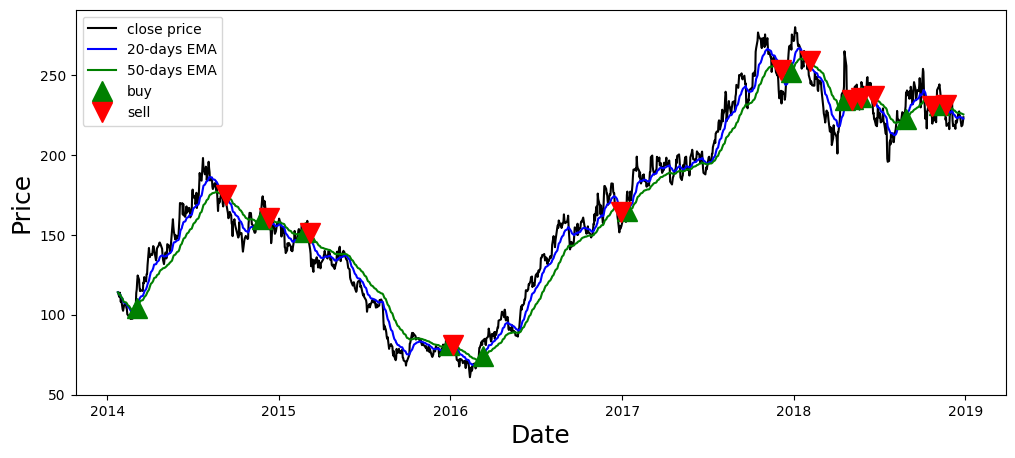

In [75]:
plt.figure(figsize = (12,5))
plt.plot(df['datetime'], df['close'], color='k', label="close price")
plt.plot(df['datetime'], df['EMA_20'], color='b', label="20-days EMA")
plt.plot(df['datetime'], df['EMA_50'], color='g', label="50-days EMA")

# Plot 'buy' signals (position == 1)
plt.plot(df[df['position'] == 1]['datetime'],
         df['EMA_20'][df['position'] == 1],
         '^', markersize=15, color='g', label='buy')

# Plot 'sell' signals (position == -1)
plt.plot(df[df['position'] == -1]['datetime'],
         df['EMA_50'][df['position'] == -1],
         'v', markersize=15, color='r', label='sell')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()

In [70]:
df.dtype

,0
datetime,datetime64[ns]
close,float64
high,float64
low,float64
open,float64
volume,int64
instrument,object
EMA_20,float64
EMA_50,float64
signal,float64


# Unit Testing

E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.004s

FAILED (errors=1)


SystemExit: True